#### Weather Notes - stuck at top for now so I can easily find

#### Meaningful dates where kaggle weather data incorrect. Either it is different than sum of hourly or missing data. 
#### 10/3/2014 Midway sum to 0.92 sum vs 1.05 kaggle. 

# Import and Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [19]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_spray = pd.read_csv('./data/spray.csv')
df_weather = pd.read_csv('./data/OhareDaily.csv')
df_traps = pd.read_csv('./data/trap_history.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_spray.shape)
print(df_weather.shape)
print(df_traps.shape)

(10506, 12)
(116293, 11)
(14835, 4)
(2163, 38)
(148, 8)


In [11]:
print(df_train.info())
print(df_test.info())
print(df_spray.info())
print(df_weather.info())
print(df_traps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-nul

In [5]:
df_train.Trap.value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
T054     163
T128     160
T151     156
T212     152
T090     151
T114     148
T158     147
T048     146
T031     146
T903     140
T008     139
T011     133
T209     130
T200     129
T073     128
T030     126
T003     122
T094     121
T028     117
T066     116
T074     115
T047     114
T102     112
T221     112
T159     111
        ... 
T150      22
T219      21
T162      21
T154      21
T206      21
T156      21
T075      20
T070      20
T071      19
T142      18
T034      17
T097      17
T050      17
T001      15
T060      15
T051      15
T044      15
T005      14
T157      14
T149      14
T072      13
T004      12
T054C      9
T078       8
T229       8
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 15 columns):
Date                         2163 non-null object
Average of Temp (F)          2163 non-null float64
Max of Temp (F)              2163 non-null int64
Min of Temp (F)              2163 non-null int64
Average of RH (%)            2163 non-null float64
Average of Dewpt (F)         2163 non-null float64
Average of Wind Spd (mph)    2163 non-null float64
Sum of Precip (in)           2163 non-null float64
Location                     2163 non-null object
Lat                          2163 non-null float64
Lon                          2163 non-null float64
Elev                         2163 non-null int64
Month                        2163 non-null int64
Day                          2163 non-null int64
Year                         2163 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 253.6+ KB


In [72]:
df_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [109]:
df_test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [110]:
df_spray.columns

Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

# Change Date column to Date time and Set as index

In [20]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [21]:
df_weather.set_index('Date', inplace=True)

In [22]:
df_train.set_index('Date', inplace=True)

# Merge Weather data onto Train Data

In [23]:
df_train_weather = pd.merge(left=df_train, right=df_weather, left_index=True, right_index=True)

In [36]:
df_train_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2007-05-29 to 2013-09-26
Data columns (total 25 columns):
Address                      10506 non-null object
Species                      10506 non-null object
Block                        10506 non-null int64
Street                       10506 non-null object
Trap                         10506 non-null object
AddressNumberAndStreet       10506 non-null object
Latitude                     10506 non-null float64
Longitude                    10506 non-null float64
AddressAccuracy              10506 non-null int64
NumMosquitos                 10506 non-null int64
WnvPresent                   10506 non-null int64
Average of Temp (F)          10506 non-null float64
Max of Temp (F)              10506 non-null int64
Min of Temp (F)              10506 non-null int64
Average of RH (%)            10506 non-null float64
Average of Dewpt (F)         10506 non-null float64
Average of Wind Spd (mph)    10506 non-null float64
Sum of 

### Reset Index on combined DataFrame

In [24]:
df_train_weather.reset_index(inplace=True)

### Set index to Trap to comine trap data

In [25]:
df_train_weather.set_index('Trap', inplace=True)
df_traps.set_index('Trap', inplace=True)

In [26]:
df_train_weather.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Average of Temp (F)', 'Max of Temp (F)',
       'Min of Temp (F)', 'Average of RH (%)', 'Average of Dewpt (F)',
       'Average of Wind Spd (mph)', 'Sum of Precip (in)', 'Location', 'Lat',
       'Lon', 'Elev', 'Month', 'Day', 'Year', 'MaxT7', 'MaxT14', 'MaxT21',
       'MinT7', 'MinT14', 'MinT21', 'AvgT7', 'AvgT14', 'AvgT21', 'AvgT28',
       'Rain7', 'Rain10', 'Rain14', 'Rain17', 'Rain21', 'Rain24', 'Rain28',
       'MaxR7', 'MaxR14', 'MaxR21', 'MaxR2d7', 'MaxR2d14', 'MaxR2d21'],
      dtype='object')

# Merge Trap Data onto Train and Weather Data

In [27]:
df_train_weather_traps = pd.merge(left=df_train_weather, right=df_traps, left_index=True, right_index=True)

In [30]:
df_train_weather_traps.reset_index(inplace=True)

In [31]:
df_train_weather_traps

,Trap,Date,Address,Species,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,MaxR2d7,MaxR2d14,MaxR2d21,any_positive,avg_mosq_per_obs,n_obs,percent_pos,neighbor_mosq_score,neighbor_onehot_score,neighbor_posrate_score
0,T001,2007-06-26,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.86,0.86,0.86,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
1,T001,2007-07-11,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.73,0.73,0.73,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
2,T001,2007-07-18,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.50,0.73,0.73,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
3,T001,2007-08-01,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.36,1.71,1.71,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
4,T001,2007-08-01,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.36,1.71,1.71,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
5,T001,2007-08-01,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,0.36,1.71,1.71,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
6,T001,2007-08-07,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,1.69,1.69,1.71,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
7,T001,2007-08-07,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,1.69,1.69,1.71,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
8,T001,2007-08-15,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS/RESTUANS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,1.37,1.69,1.69,0,2.500000,10,0.000000,0.027974,0.013051,0.026103
9,T001,2007-08-15,"4000 North Tripp Avenue, Chicago, IL 60641, USA",CULEX PIPIENS,40,N TRIPP AVE,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,...,1.37,1.69,1.69,0,2.500000,10,0.000000,0.027974,0.013051,0.026103


# EDA

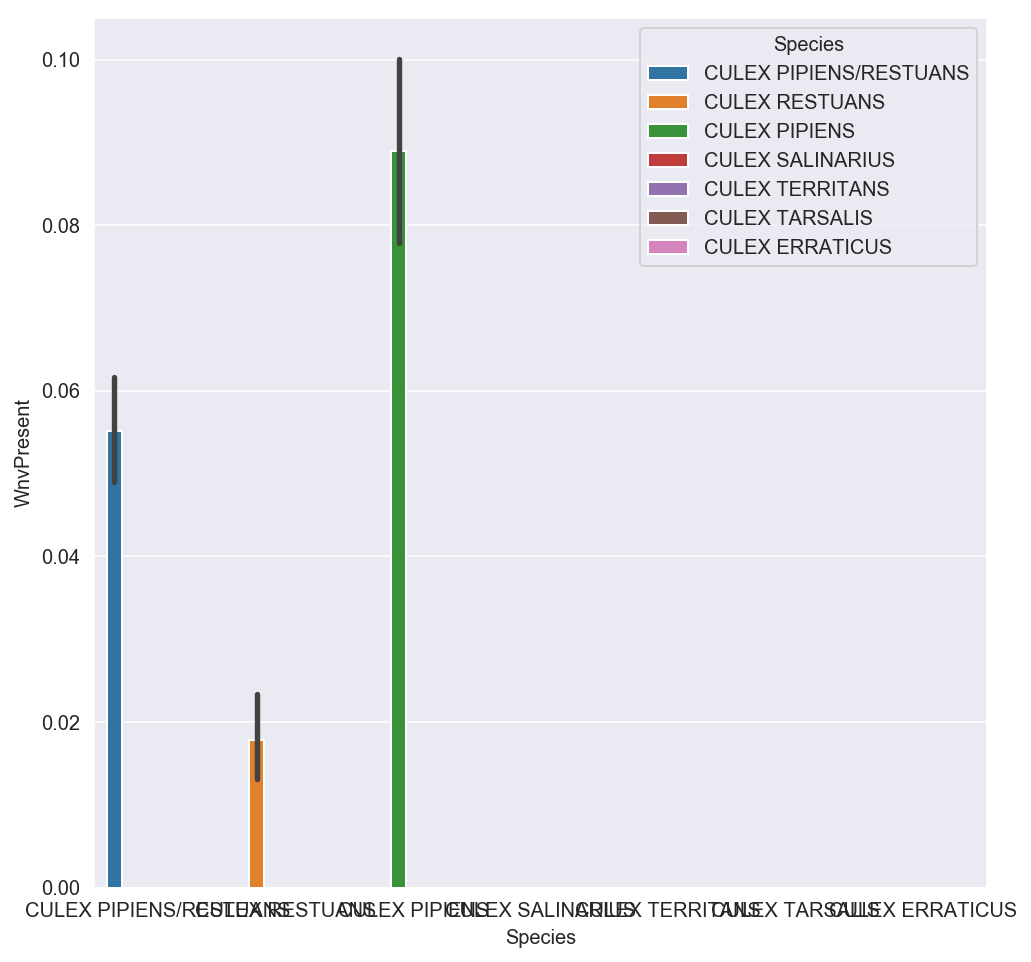

In [10]:
plt.figure(figsize=(8,8))
sns.barplot(df_train.Species, df_train.WnvPresent, hue=df_train.Species)

In [80]:
df_train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,2007
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2007


In [77]:
df_train.Date.dt

In [112]:
df_spray.Longitude.value_counts()

-87.794225    541
-87.806911      9
-87.806863      9
-87.816751      7
-87.805711      6
-87.805615      6
-87.810415      5
-87.808351      5
-87.811567      5
-87.813727      5
-87.813199      5
-87.811855      5
-87.806959      5
-87.814111      4
-87.798775      4
-87.810319      4
-87.803695      4
-87.705312      4
-87.808255      4
-87.710883      4
-87.812767      4
-87.809407      4
-87.811903      4
-87.815983      4
-87.815188      4
-87.799762      3
-87.812017      3
-88.095143      3
-87.770608      3
-87.733588      3
             ... 
-87.741028      1
-87.769603      1
-87.800045      1
-87.804170      1
-87.811397      1
-87.767268      1
-87.808390      1
-87.620657      1
-87.685887      1
-87.817423      1
-87.792414      1
-87.712677      1
-87.706483      1
-87.708160      1
-87.612317      1
-87.680170      1
-87.684527      1
-87.808737      1
-87.818067      1
-87.807871      1
-87.715878      1
-87.659443      1
-87.640740      1
-87.729017      1
-87.799135

In [35]:
for col in df_train:
    print(df_train[col].unique())

['2007-05-29' '2007-06-05' '2007-06-26' '2007-06-29' '2007-07-02'
 '2007-07-11' '2007-07-18' '2007-07-19' '2007-07-25' '2007-07-27'
 '2007-08-01' '2007-08-02' '2007-08-03' '2007-08-07' '2007-08-08'
 '2007-08-09' '2007-08-15' '2007-08-16' '2007-08-17' '2007-08-21'
 '2007-08-22' '2007-08-24' '2007-08-28' '2007-09-04' '2007-09-05'
 '2007-09-06' '2007-09-12' '2007-09-18' '2007-09-19' '2007-09-24'
 '2007-09-25' '2007-10-04' '2007-10-09' '2009-05-28' '2009-06-02'
 '2009-06-03' '2009-06-05' '2009-06-12' '2009-06-15' '2009-06-19'
 '2009-06-22' '2009-06-26' '2009-06-29' '2009-07-06' '2009-07-10'
 '2009-07-13' '2009-07-17' '2009-07-24' '2009-07-27' '2009-07-31'
 '2009-08-07' '2009-08-13' '2009-08-25' '2009-08-27' '2009-09-03'
 '2009-09-14' '2009-09-17' '2009-09-25' '2009-10-01' '2011-06-10'
 '2011-06-17' '2011-06-24' '2011-06-30' '2011-07-11' '2011-07-15'
 '2011-07-25' '2011-07-29' '2011-08-05' '2011-08-12' '2011-08-19'
 '2011-08-26' '2011-09-01' '2011-09-02' '2011-09-12' '2011-09-16'
 '2011-09-

In [87]:
for col in df_test:
    print(df_test[col].unique())

[     1      2      3 ... 116291 116292 116293]
['2008-06-11' '2008-06-17' '2008-06-24' '2008-07-01' '2008-07-04'
 '2008-07-11' '2008-07-14' '2008-07-21' '2008-07-23' '2008-07-24'
 '2008-07-28' '2008-07-29' '2008-08-04' '2008-08-05' '2008-08-12'
 '2008-08-13' '2008-08-19' '2008-08-25' '2008-08-26' '2008-09-02'
 '2008-09-03' '2008-09-09' '2008-09-15' '2008-09-19' '2008-09-29'
 '2010-06-02' '2010-06-11' '2010-06-18' '2010-06-25' '2010-06-28'
 '2010-07-01' '2010-07-02' '2010-07-12' '2010-07-13' '2010-07-16'
 '2010-07-19' '2010-07-23' '2010-07-26' '2010-07-29' '2010-07-30'
 '2010-08-05' '2010-08-06' '2010-08-13' '2010-08-19' '2010-08-20'
 '2010-08-26' '2010-08-27' '2010-09-02' '2010-09-10' '2010-09-13'
 '2010-09-16' '2010-09-17' '2010-09-23' '2010-09-24' '2010-10-01'
 '2012-06-08' '2012-06-15' '2012-06-21' '2012-06-29' '2012-07-09'
 '2012-07-13' '2012-07-19' '2012-07-20' '2012-07-27' '2012-08-03'
 '2012-08-09' '2012-08-10' '2012-08-16' '2012-08-17' '2012-08-23'
 '2012-08-24' '2012-08-30' '

In [103]:
for col in df_spray:
    print(df_spray[col].unique())

['2011-08-29' '2011-09-07' '2013-07-17' '2013-07-25' '2013-08-08'
 '2013-08-15' '2013-08-16' '2013-08-22' '2013-08-29' '2013-09-05']
['6:56:58 PM' '6:57:08 PM' '6:57:18 PM' ... '8:04:01 PM' '8:04:11 PM'
 '8:04:21 PM']
[42.39162333 42.39134833 42.39102167 ... 42.00602167 42.00545333
 42.004805  ]
[-88.08916333 -88.08915667 -88.08915833 ... -87.81739167 -87.81742333
 -87.81746   ]


In [105]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [106]:
print(sorted(df_train.Date.unique()))

['2007-05-29', '2007-06-05', '2007-06-26', '2007-06-29', '2007-07-02', '2007-07-11', '2007-07-18', '2007-07-19', '2007-07-25', '2007-07-27', '2007-08-01', '2007-08-02', '2007-08-03', '2007-08-07', '2007-08-08', '2007-08-09', '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-21', '2007-08-22', '2007-08-24', '2007-08-28', '2007-09-04', '2007-09-05', '2007-09-06', '2007-09-12', '2007-09-18', '2007-09-19', '2007-09-24', '2007-09-25', '2007-10-04', '2007-10-09', '2009-05-28', '2009-06-02', '2009-06-03', '2009-06-05', '2009-06-12', '2009-06-15', '2009-06-19', '2009-06-22', '2009-06-26', '2009-06-29', '2009-07-06', '2009-07-10', '2009-07-13', '2009-07-17', '2009-07-24', '2009-07-27', '2009-07-31', '2009-08-07', '2009-08-13', '2009-08-25', '2009-08-27', '2009-09-03', '2009-09-14', '2009-09-17', '2009-09-25', '2009-10-01', '2011-06-10', '2011-06-17', '2011-06-24', '2011-06-30', '2011-07-11', '2011-07-15', '2011-07-25', '2011-07-29', '2011-08-05', '2011-08-12', '2011-08-19', '2011-08-26', '2011

In [17]:
print(sorted(df_spray.Date.unique()))

['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25', '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22', '2013-08-29', '2013-09-05']


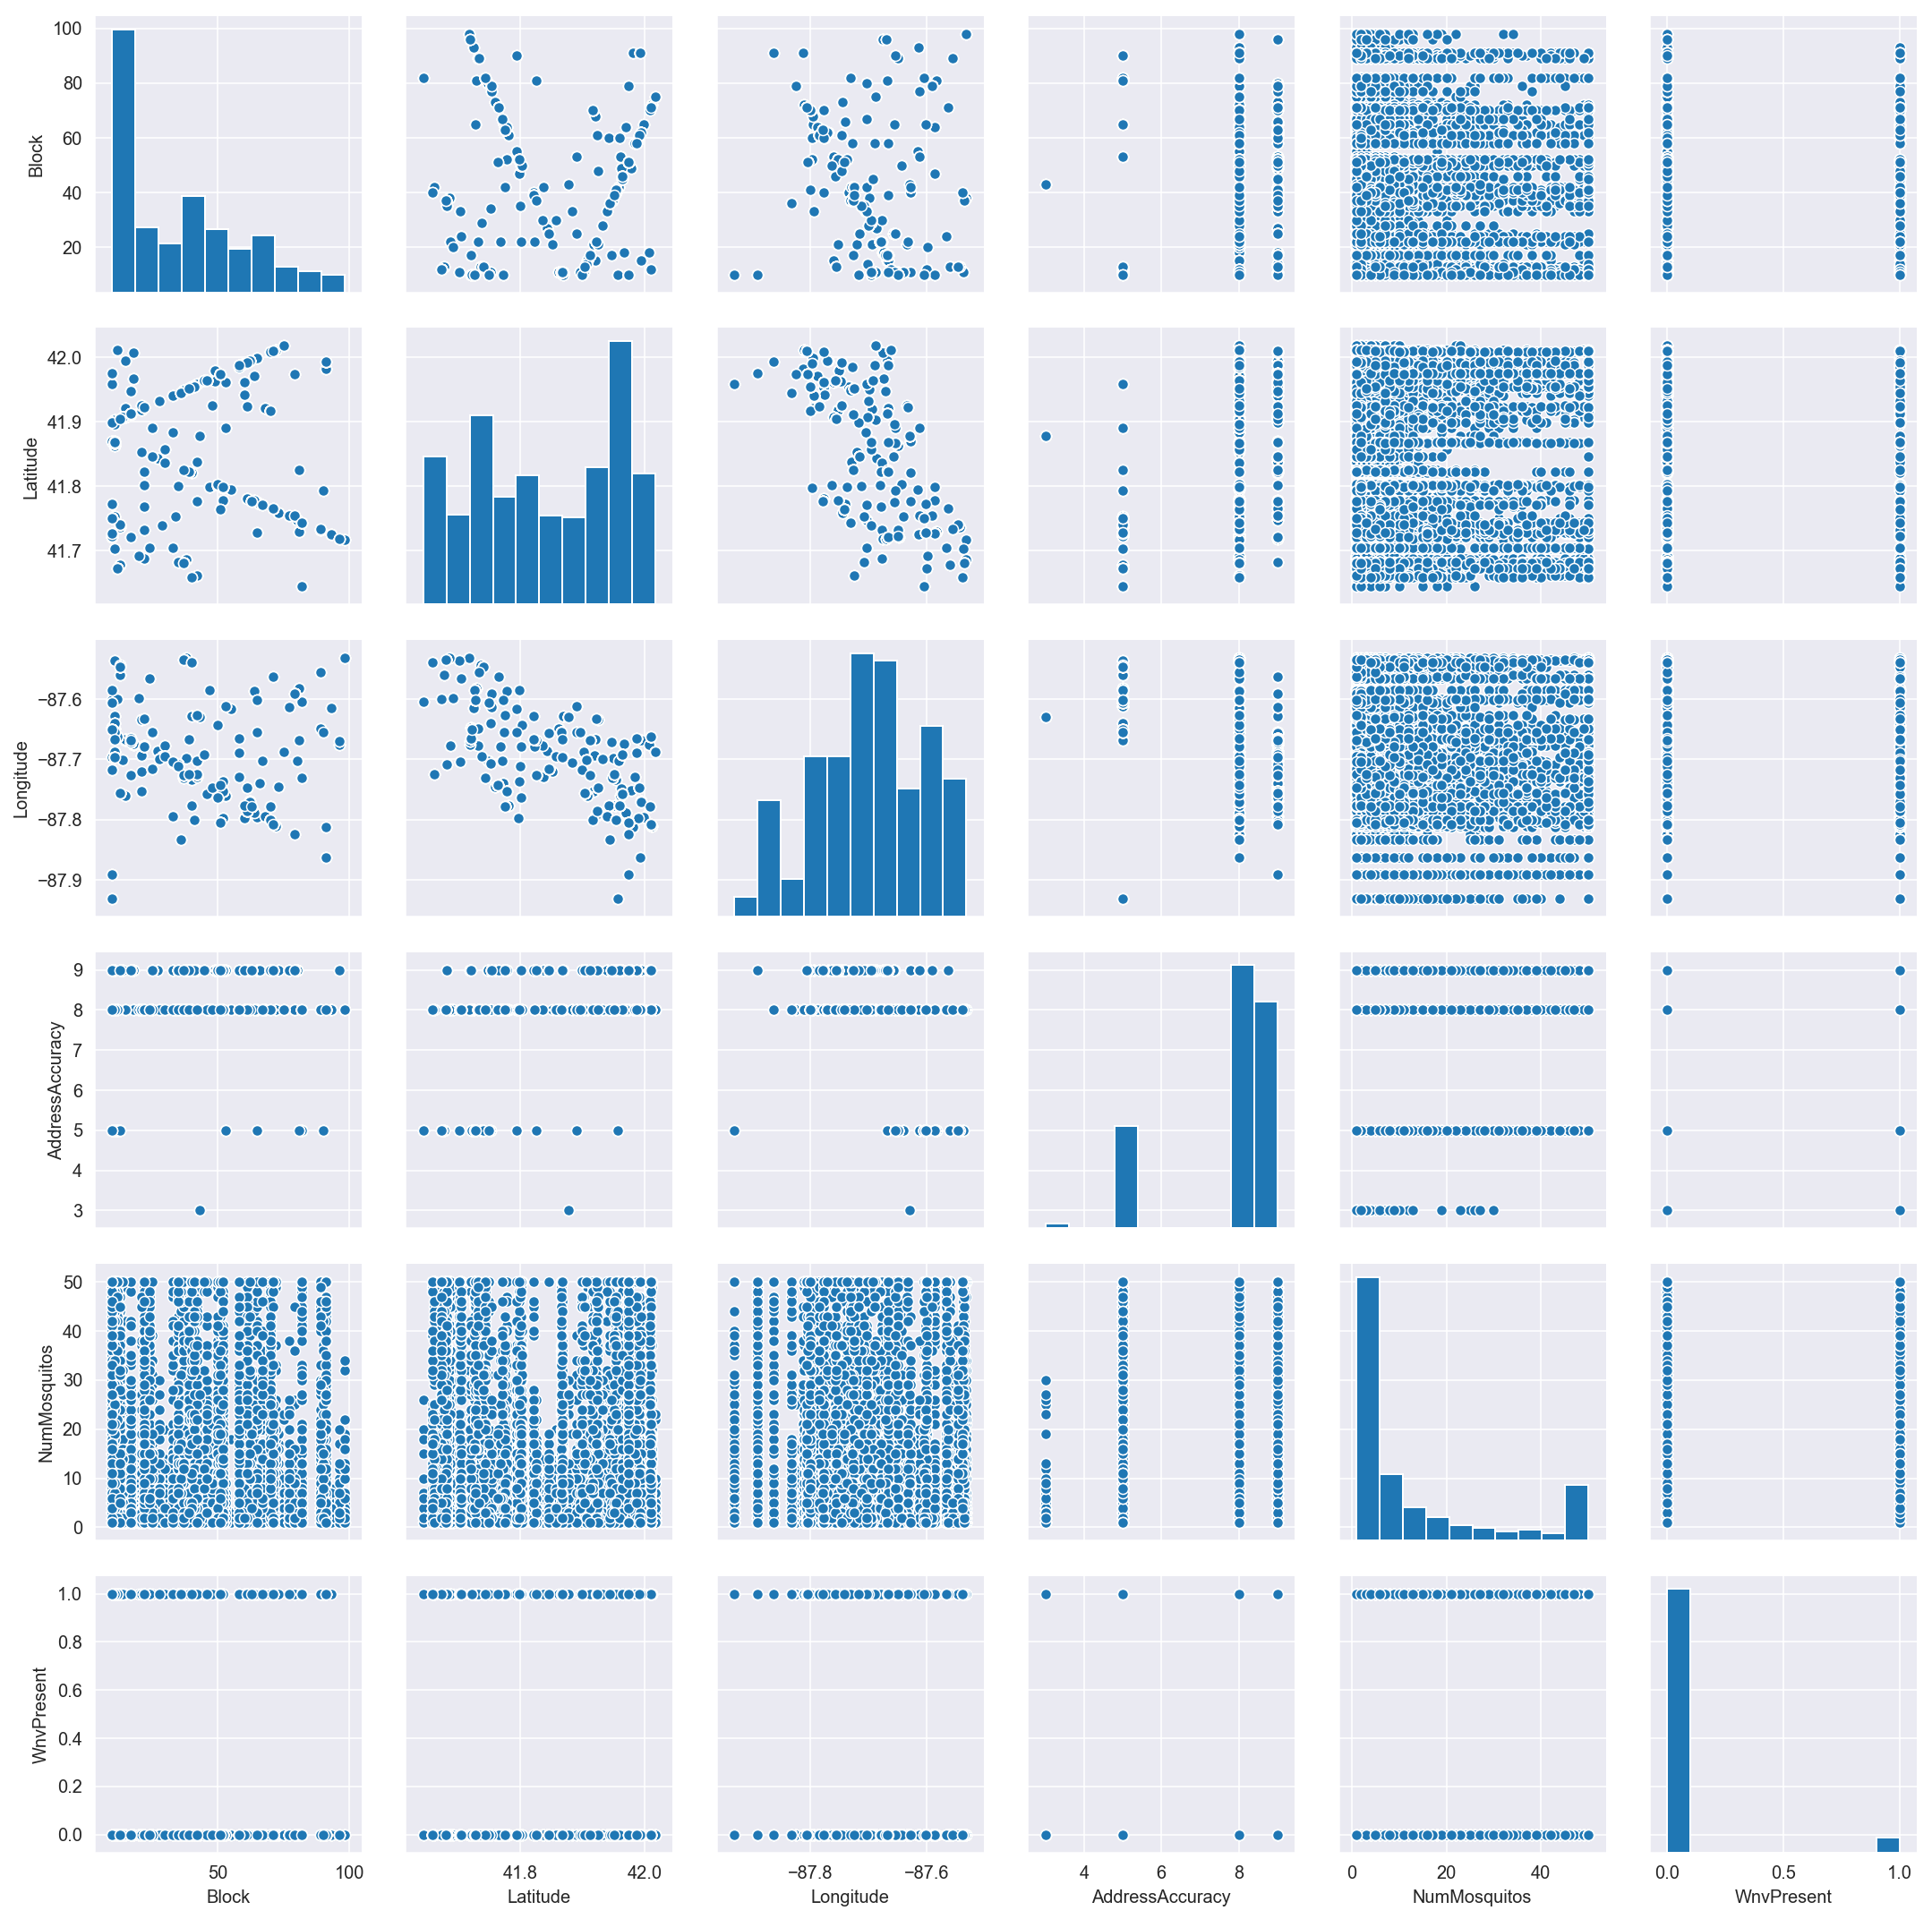

In [66]:
sns.pairplot(df_train)

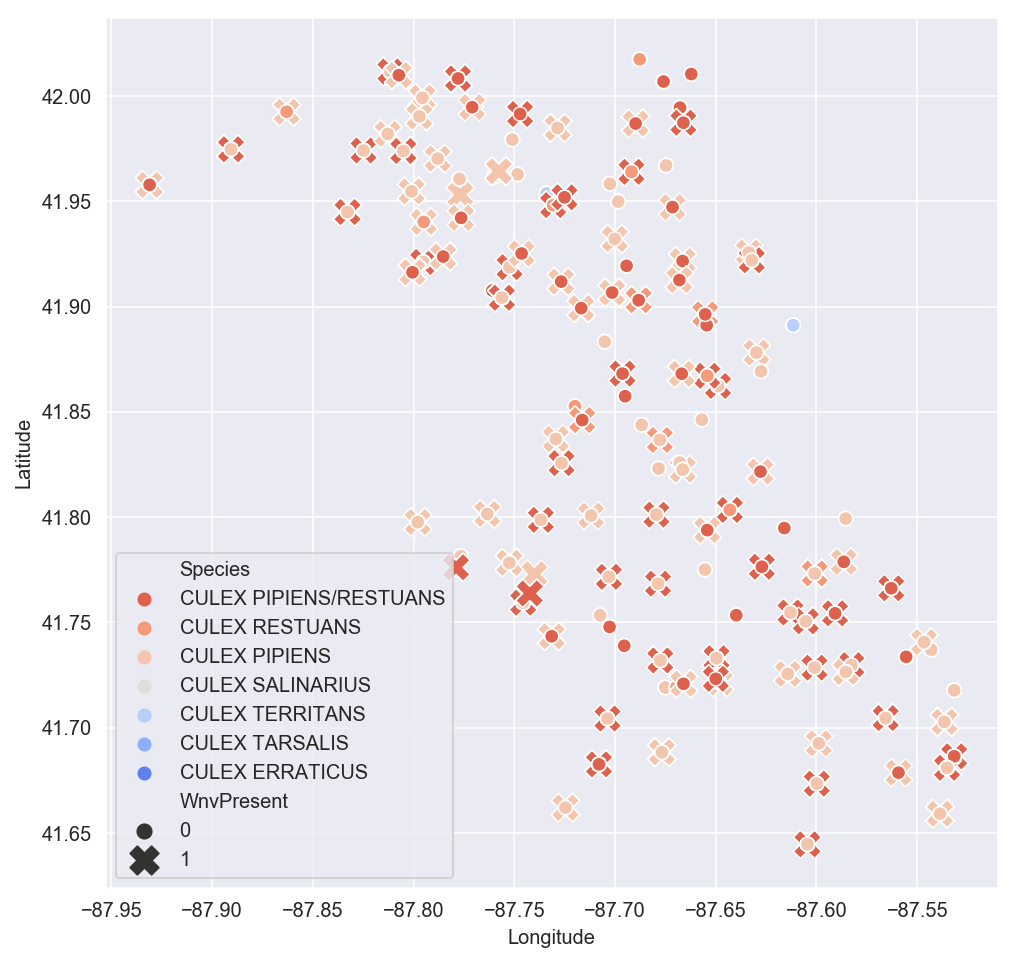

In [57]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_train.Longitude, df_train.Latitude, hue=df_train.Species, palette='coolwarm_r', style=df_train.WnvPresent ,  size=df_train.WnvPresent, sizes=(200, 50) );

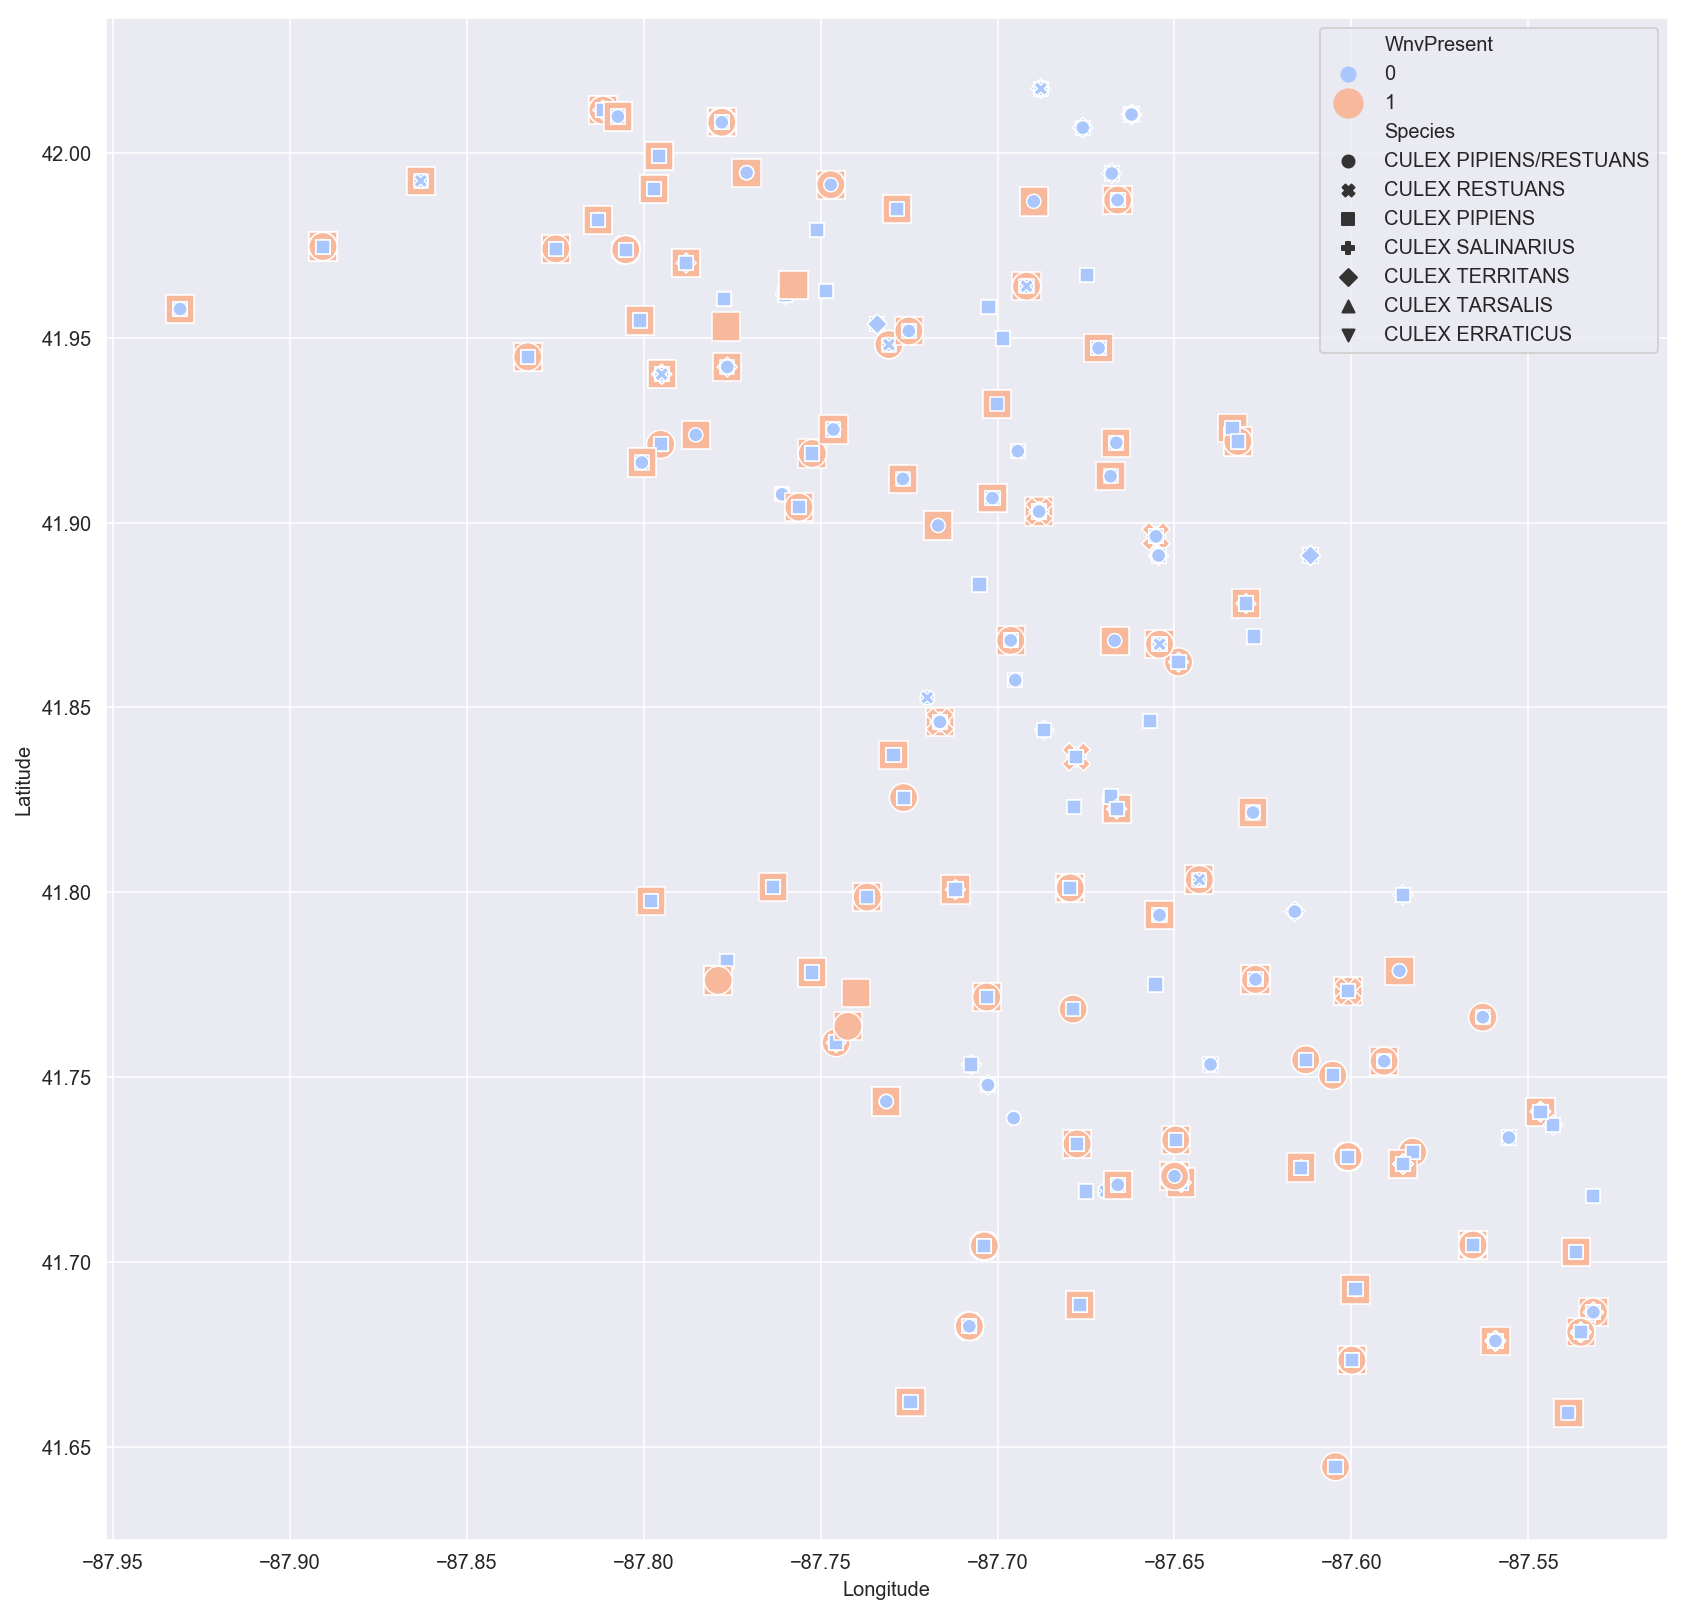

In [65]:
plt.figure(figsize=(14,14))
sns.scatterplot(df_train.Longitude, df_train.Latitude, hue=df_train.WnvPresent, palette='coolwarm', style=df_train.Species ,  size=df_train.WnvPresent, sizes=(200, 50) );

In [46]:
df_train.resample('M').mean()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,
2007-05-31,36.240000,41.876884,-87.696170,7.920000,1.600000,0.000000
2007-06-30,38.551136,41.887704,-87.716944,8.210227,2.431818,0.000000
2007-07-31,35.434783,41.834128,-87.681384,7.573913,12.520000,0.010435
2007-08-31,34.320488,41.795195,-87.657426,7.309268,19.519512,0.097561
2007-09-30,35.748062,41.811805,-87.669031,7.475452,12.015504,0.036176
2007-10-31,39.483412,41.836474,-87.685864,7.890995,8.085308,0.009479
2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-31,NaN,NaN,NaN,NaN,NaN,NaN


# Model

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

In [33]:
# set combined dataframe of train and weather to df 
df = df_train_weather_traps

In [34]:
# get dummies for each species
df = pd.get_dummies(df, columns=['Species'])

In [35]:
df.columns

Index(['Trap', 'Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'WnvPresent', 'Average of Temp (F)', 'Max of Temp (F)',
       'Min of Temp (F)', 'Average of RH (%)', 'Average of Dewpt (F)',
       'Average of Wind Spd (mph)', 'Sum of Precip (in)', 'Location', 'Lat',
       'Lon', 'Elev', 'Month', 'Day', 'Year', 'MaxT7', 'MaxT14', 'MaxT21',
       'MinT7', 'MinT14', 'MinT21', 'AvgT7', 'AvgT14', 'AvgT21', 'AvgT28',
       'Rain7', 'Rain10', 'Rain14', 'Rain17', 'Rain21', 'Rain24', 'Rain28',
       'MaxR7', 'MaxR14', 'MaxR21', 'MaxR2d7', 'MaxR2d14', 'MaxR2d21',
       'any_positive', 'avg_mosq_per_obs', 'n_obs', 'percent_pos',
       'neighbor_mosq_score', 'neighbor_onehot_score',
       'neighbor_posrate_score', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Spe

In [46]:
# create a list of maual feaures to be used for both train and test sets
features = ['Latitude', 'Longitude', 
            'Average of Temp (F)', 'Max of Temp (F)', 'Min of Temp (F)',  
            'Average of Dewpt (F)', 'Sum of Precip (in)',
            'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX TARSALIS',
            'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS', 'Species_CULEX ERRATICUS',
            'Month', 'Day', 'Year', 'MaxT7', 'MaxT14', 'MaxT21',
            'MinT7', 'MinT14', 'MinT21', 'AvgT7', 'AvgT14', 'AvgT21', 'AvgT28',
            'Rain7', 'Rain10', 'Rain14', 'Rain17', 'Rain21', 'Rain24', 'Rain28',
            'MaxR7', 'MaxR14', 'MaxR21', 'MaxR2d7', 'MaxR2d14', 'MaxR2d21',
            'any_positive', 'avg_mosq_per_obs', 'n_obs', 'percent_pos',
            'neighbor_mosq_score', 'neighbor_onehot_score']




In [47]:
# to manually select features edit the X list
X = df[features]

# set y equal to the target column
y = df['WnvPresent']

#train test split, stratify on y, set random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 34)

# show shape of splits
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (7354, 46)
X_test : (3152, 46)
y_train : (7354,)
y_test : (3152,)


In [48]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic Regression

In [50]:
logreg = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 10, 5)
    
}
gs_logreg = GridSearchCV(logreg, param_grid=params , scoring='roc_auc', verbose=1, return_train_score=True)

gs_logreg.fit(X_train, y_train)

print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   48.6s finished


{'C': 1.0, 'penalty': 'l2'}
0.8388488278844835


In [51]:
model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# PCA

In [49]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
gs_logreg.fit(X_train_pca, y_train)

print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   33.3s finished


{'C': 10.0, 'penalty': 'l1'}
0.8276845759700706


# Random Forest Classifier

In [ ]:
model = RandomForestClassifier(min_samples_split=3, min_samples_leaf=10, class_weight='balanced', n_estimators=1000)
model.fit(X_train,y_train)

In [83]:
params = {
    'min_samples_split': [3,4],
    'min_samples_leaf': range(9, 11, 1),
    'class_weight': ['balanced'],
    'n_estimators': [1000, 1100],
}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='roc_auc', verbose=1)
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.2min finished


{'class_weight': 'balanced', 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 1000}
0.8470940468998477


In [84]:
model = RandomForestClassifier(min_samples_split=3, min_samples_leaf=10, class_weight='balanced', n_estimators=1000)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

#### Evaluate Model

In [85]:
predictions = model.predict(X_test) 

In [86]:
cm = confusion_matrix(y_test, predictions, labels=[1,0])

In [87]:
cm_df = pd.DataFrame(cm, columns=['predicted pos wnv', 'predicted neg wnv'],
                     index=['actual pos wnv', 'actual neg wnv'])

In [88]:
cm_df

,predicted pos wnv,predicted neg wnv
actual pos wnv,97,68
actual neg wnv,377,2610


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92      2987
          1       0.20      0.59      0.30       165

avg / total       0.93      0.86      0.89      3152



# Test Set

In [90]:
df_test = pd.read_csv('./data/test.csv')

In [91]:
df_test.shape

(116293, 11)

In [92]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [93]:
df_test.set_index('Date', inplace=True)

## Merge Weather Data onto Test Data

In [94]:
df_test_weather = pd.merge(left=df_test, right=df_weather, left_index=True, right_index=True)

### Reset Index on combined DataFrame

In [95]:
df_test_weather.reset_index(inplace=True)

### Set index to Trap to comine trap data

In [96]:
df_test_weather.set_index('Trap', inplace=True)

## Merge Trap Data onto Test and Weather Data

In [97]:
df_test_weather_traps = pd.merge(left=df_test_weather, right=df_traps, left_index=True, right_index=True)

### Reset Index 

In [98]:
df_test_weather_traps.reset_index(inplace=True)

## Create Dummies for Species on Test Data 

In [99]:
df_test_weather_traps = pd.get_dummies(df_test_weather_traps, columns=['Species'])

## Set Features on Test Data

In [100]:
XX_test = df_test_weather_traps[features]
XX_test.shape

(115533, 46)

## Predict WNV

In [101]:
df_test_weather_traps['WnvPresent'] = model.predict(XX_test) 

## Create Upload File

In [102]:
upload = df_test_weather_traps.filter(['Id', 'WnvPresent'], axis=1)
upload = upload.set_index('Id')

In [103]:
upload.to_csv('wnvupload.csv')